<a href="https://colab.research.google.com/github/ASWATHI-A123/ASWATHI-A/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data=pd.read_csv("/StudentsPerformance.csv")

#Q1.Find out how many males and females participated in the test.


In [36]:
count=data['gender'].value_counts().reset_index()
count.columns=["Gender","Count"]
count

,Gender,Count
0,female,518
1,male,482


#Q2.What do you think about the students' parental level of education?

In [49]:
prnt_edu=data['parental level of education'].value_counts().reset_index()
prnt_edu.columns=['Degree','Count']
prnt_edu

,Degree,Count
0,some college,226
1,associate's degree,222
2,high school,196
3,some high school,179
4,bachelor's degree,118
5,master's degree,59


Majority of parents having level of education at some college level and associate degree level.Among the 1000 parents only 59 have master's degree.

# Q3.Who scores the most on average for math, reading and writing based on
# ● Gender
# ● Test preparation course

# Average Score by Gender

In [55]:
gender_mean=data.groupby('gender')[['math score','reading score','writing score']].mean().round(2)
gender_mean


,math score,reading score,writing score
gender,,,
female,63.38,72.59,72.47
male,68.82,65.55,63.45


INFERENCE: Females score more than males in both reading and writing.Whereas males score more than females in maths

# Average Score by Test preparation course

In [54]:
tpc_mean=data.groupby('test preparation course').mean().round(2)
tpc_mean

<ipython-input-54-e8a0f8d2e7d9>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,math score,reading score,writing score
test preparation course,,,
completed,69.97,74.18,74.68
none,63.79,66.42,64.46


INFERENCE:The average score for all the three that is for maths,reading as well as writing is more for those students who completed the test preparation course than that of not completed the course.

#Q4.What do you think about the scoring variation for math, reading and writing
# based on

# ● Gender
# ● Test preparation course


# Score variation based on gender

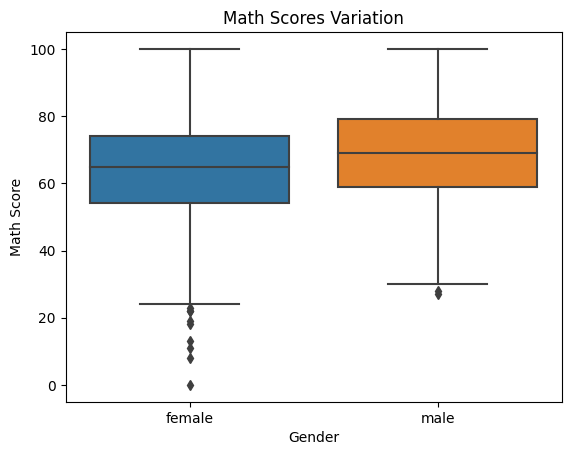

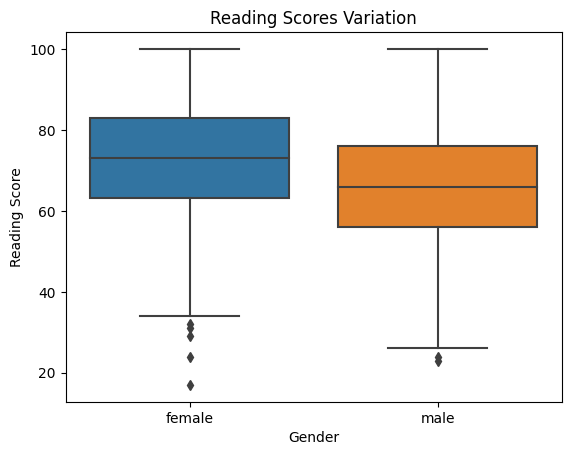

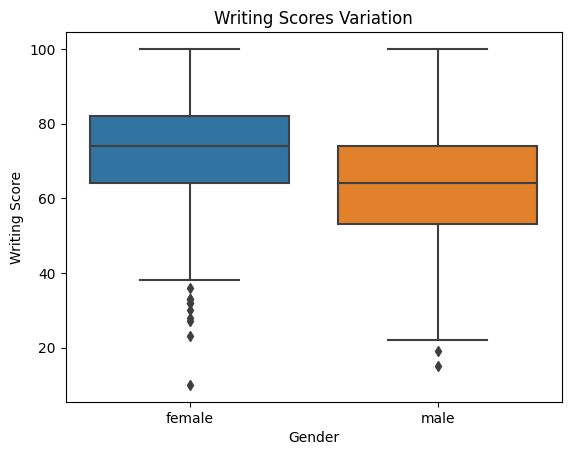

In [58]:
plt.figure()
sns.boxplot(data=data, x='gender', y='math score')
plt.title('Math Scores Variation')
plt.xlabel('Gender')
plt.ylabel('Math Score')
plt.show()

plt.figure()
sns.boxplot(data=data, x='gender', y='reading score')
plt.title('Reading Scores Variation')
plt.xlabel('Gender')
plt.ylabel('Reading Score')
plt.show()

plt.figure()
sns.boxplot(data=data, x='gender', y='writing score')
plt.title('Writing Scores Variation')
plt.xlabel('Gender')
plt.ylabel('Writing Score')
plt.show()

INFERENCE:The outliers are more in females in all the three scores variations.

# Score variation based on Test preparation course

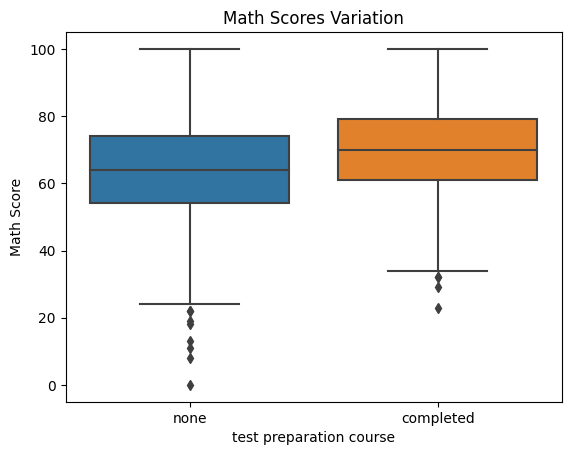

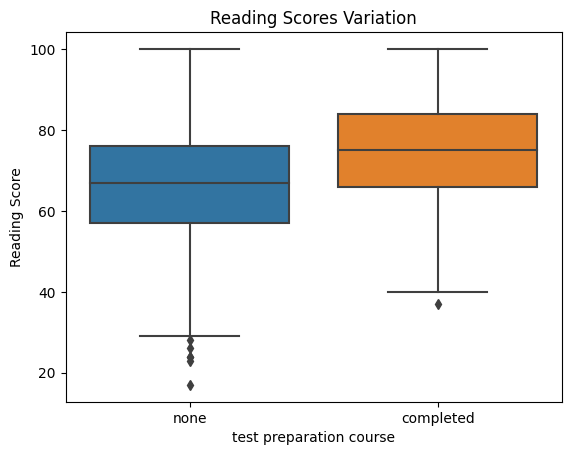

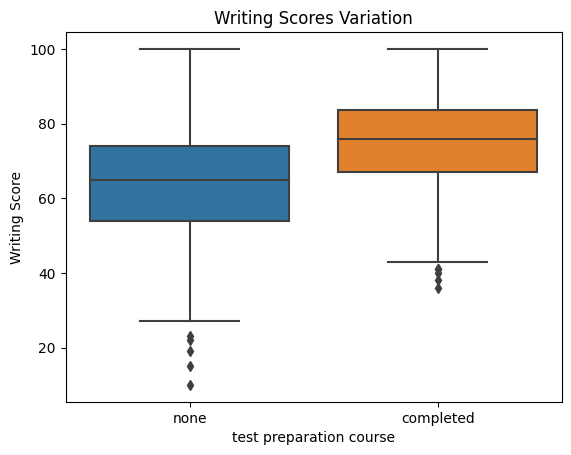

In [57]:
plt.figure()
sns.boxplot(data=data, x='test preparation course', y='math score')
plt.title('Math Scores Variation')
plt.xlabel('test preparation course')
plt.ylabel('Math Score')
plt.show()

plt.figure()
sns.boxplot(data=data, x='test preparation course', y='reading score')
plt.title('Reading Scores Variation')
plt.xlabel('test preparation course')
plt.ylabel('Reading Score')
plt.show()

plt.figure()
sns.boxplot(data=data, x='test preparation course', y='writing score')
plt.title('Writing Scores Variation')
plt.xlabel('test preparation course')
plt.ylabel('Writing Score')
plt.show()

# Q5.The management needs your help to give bonus points to the top 25% of students based on their math score, so how will you help the management to achieve this.

It can be achieved by the following steps: 

1.Sort the students' data based on their math scores in descending order.

2.Calculate the cutoff score that corresponds to the top 25% of students.

3.Identify the students who have math scores higher than or equal to the cutoff score.

4.Assign the bonus points to those students.

In [45]:

# Sort the data based on math scores in descending order
sorted_data = data.sort_values('math score', ascending=False)
sorted_data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
2,female,group B,some high school,free/reduced,none,18,32,28
51,female,group C,some high school,free/reduced,none,13,41,51
3,female,group B,some college,standard,none,11,38,32
1,female,group B,high school,free/reduced,none,8,24,23


In [46]:
# Calculate the cutoff score for the top 25% of students
cutoff_index = int(len(sorted_data) * 0.25)
cutoff_score = sorted_data.iloc[cutoff_index]['math score']
# Identify the students with scores higher than or equal to the cutoff score
top_students = sorted_data[sorted_data['math score'] >= cutoff_score]
top_students

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
999,male,group E,bachelor's degree,standard,completed,100,100,100
996,male,group A,some college,standard,completed,100,96,86
515,female,group E,some college,standard,none,100,92,97
517,female,group E,associate's degree,standard,none,100,100,100
516,female,group E,bachelor's degree,standard,none,100,100,100
...,...,...,...,...,...,...,...,...
851,male,group D,some college,standard,completed,77,62,62
849,male,group A,bachelor's degree,standard,none,77,67,68
850,male,group C,associate's degree,free/reduced,none,77,67,64
421,female,group C,some college,free/reduced,none,77,90,91
